# 염경환 vs 조정석 클라우드 분석을 통한 차이점 확인

In [212]:
# 기본 분석도구

import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  matplotlib as mpl
from tqdm import tqdm

## 시각화 한글 
mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 폰트
plt.rcParams['font.family'] = 'NanumGothicCoding' # 리눅스 폰트


# 텍스트 정제 관련도구

from konlpy.tag import  Okt
import re
import konlpy
okt = Okt()
import nltk

# Word Cloud
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

## Use Data

In [14]:
cd ~/WorkSpace/GoogleDrive/Data/'내일프로젝트(홀푸드코리아)'/

/home/miwoos/WorkSpace/GoogleDrive/Data/내일프로젝트(홀푸드코리아)


In [15]:
ls

 건강기능식품.csv            '제주스 양배추 관련키워드.png'   홀푸드코리아.csv
 업종별성별카드이용정보.csv   제주채소류재배현황.csv
 염경환관련데이터.csv         조정석관련데이터.csv


In [16]:
pwd

'/home/miwoos/WorkSpace/GoogleDrive/Data/내일프로젝트(홀푸드코리아)'

## 염경환

In [91]:
df_염경환 = pd.read_csv('염경환관련데이터.csv')

In [92]:
df_염경환.head(1)

,제목,날짜,내용,href,본문내용
0,하노이 러우 하노이맛집 배틀트립에 나온 염경환 러우식당,2021.05.10.,이름이 염경환 러우식당이라고 치면 나오는게 너무 웃기면서도 염경환씨 식당인줄.. ㅋ...,https://blog.naver.com/dladidwn8?Redirect=Log&...,\n​​여행하는 동안짠내투어나 배틀트립원나잇푸드트립 등.. 여행프로그램을 섭렵하는 ...


In [93]:
df_염경환.본문내용[0][:500]

'\n\u200b\u200b여행하는 동안짠내투어나 배틀트립원나잇푸드트립 등.. 여행프로그램을 섭렵하는 편인데..\u200b\u200b그중에서도 항상 한두개씩 어라? 하면서 꽂히는게 있기 마련..하노이편은 맥주거리에 이어 바로 이 러우집\u200b러우를 먹어본적도 없고배틀트립에서 처음 본 메뉴이기도 해서숙소랑 거리가 좀 멀었지만 택시타고 갔다!!!!!!!\u200b\n\n\u200b이름이 염경환 러우식당이라고 치면 나오는게너무 웃기면서도 염경환씨 식당인줄..ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\u200b\u200b\u200b영업시간  10:00 ~ 21:30(휴무 없음, 전요일 영업시간 동일)\u200b\u200b\u200b\n\n\u200b택시 내렸을때코앞에 두고 어디있지 하면서 한참을 찾았다..\u200b겉으로 보기엔 무슨 오토바이샵같애요?..음식점 안같음..\u200b노란간판.. 메모..\u200b\u200b\u200b\n\n\u200b\u200b넓은 마당을 지나 들어가야식당이 나온다\u200b\u200b\u200b\u200b\n\n\u200b\u200b나름 가림막도 설치해서먼지 걱정 노노\u200b\u200b\u200b\n\n\u200b홀도 되게 넓은편\u200b외국인은 한명도 없었고다 현지인들만 있었다!!\u200b\u200b\u200b\u200b\n\n\u200b베트남식 샤브샤브 전골 ! 러우\u200b\u200b이게 기본사이즈요게 성인 3인양이라고 하는'

In [102]:
tokens = []
for words in tqdm(df_염경환.본문내용):
    word = okt.nouns(str(words))
    tokens.append(word)

100%|███████████████████████████████████████| 1050/1050 [00:32<00:00, 32.31it/s]


In [114]:
tokens[0][len(tokens[0])-2]

'베트남'

In [116]:
tokenss = []
for a in tqdm(tokens):
    for b in a:
        tokenss.append(b)

100%|███████████████████████████████████| 1050/1050 [00:00<00:00, 154918.36it/s]


In [118]:
tokenss[:100]

['여행',
 '동안',
 '투어',
 '배틀',
 '트립',
 '나잇',
 '푸드',
 '트립',
 '등',
 '여행',
 '프로그램',
 '섭렵',
 '편',
 '중',
 '항상',
 '개',
 '마련',
 '하노',
 '이편',
 '맥주',
 '거리',
 '바로',
 '이',
 '러우집',
 '러우',
 '적도',
 '배틀',
 '트립',
 '처음',
 '메뉴',
 '숙소',
 '거리',
 '좀',
 '택시',
 '타고',
 '이름',
 '염경환',
 '러우식당',
 '치면',
 '염경환',
 '식당',
 '줄',
 '영업',
 '시간',
 '휴무',
 '요일',
 '영업',
 '시간',
 '동일',
 '택시',
 '때',
 '코앞',
 '어디',
 '한참',
 '겉',
 '보기',
 '무슨',
 '오토바이',
 '애',
 '음식점',
 '간판',
 '메모',
 '마당',
 '지나',
 '식당',
 '나름',
 '가림',
 '막도',
 '설치',
 '먼지',
 '걱정',
 '노노',
 '홀',
 '편',
 '외국인',
 '명도',
 '지인',
 '베트남',
 '샤브샤브',
 '전골',
 '러우',
 '이',
 '요게',
 '성인',
 '인양',
 '생각',
 '더',
 '한화',
 '약',
 '메뉴판',
 '사진',
 '메뉴',
 '이름',
 '메뉴',
 '가작',
 '사이즈',
 '팔고',
 '고기랑',
 '해산물',
 '잔뜩']

In [119]:
new_tokens =[]
for token in tokenss:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [64]:
new_tokens[:50]

['여행',
 '동안',
 '투어',
 '배틀',
 '트립',
 '나잇',
 '푸드',
 '트립등',
 '여행',
 '프로그램',
 '섭렵',
 '편',
 '항상',
 '세인트루이스',
 '카디널스',
 '김광현',
 '나이키',
 '학력',
 '연봉',
 '이상',
 '희생',
 '년월',
 '년월',
 '출신',
 '경기도',
 '안산시',
 '본관',
 '김해',
 '이글',
 '신분',
 '라면',
 '탈모',
 '고민',
 '또',
 '두피',
 '문신',
 '시술',
 '대해',
 '정말',
 '결과',
 '대표',
 '디',
 '블랙',
 '아카데미',
 '군산',
 '점',
 '연예인',
 '염경환',
 '두피',
 '타투']

In [120]:
len(new_tokens)

63061

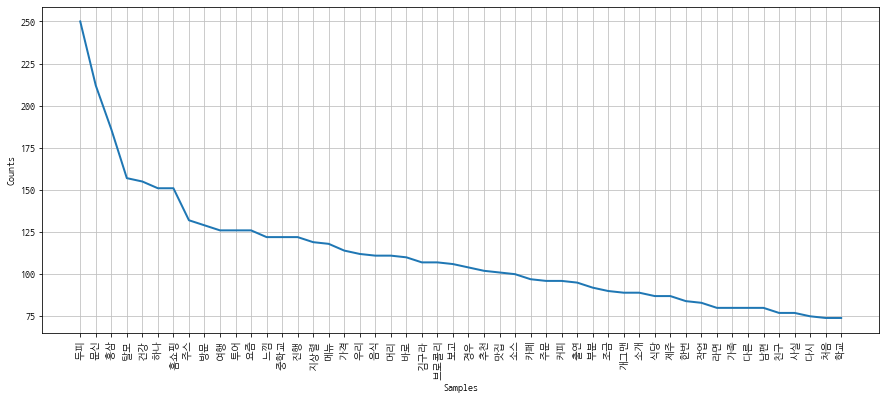

In [206]:
염경환 = nltk.Text(new_tokenss, name='염경환')
plt.figure(figsize=(15,6))
염경환.plot(50)
plt.show()

In [122]:
len(염경환)

63061

In [205]:
stop_words = '''것 수 때 맛 분 더 이 저 곳 기 그 안 요 거 등 중 제 집 위 나 날 내 개 또 해 맡 후 의 번 전 좀 세 의 듯 명 건 알 릉 층 말 점 포 명 견 도 및 염경환 양배추 방송 즙 제품 베트남 하노이 유기농 베트남 하노이 유기농 생각 사람 사용 정도 때문 여기 오늘 정말 시간 시술 살 꼭 시작 쇼 한국 출현 위해 구매 연예인 사진 그냥 시술 일 방법 기술''' 
stop_list = stop_words.split()
new_token_list = []
for token in new_tokens:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list
new_tokenss = [token for token in new_tokens if token not in stop_list]

In [207]:
data = 염경환.vocab().most_common(300)
data[:50]

[('두피', 250),
 ('문신', 212),
 ('홍삼', 186),
 ('탈모', 157),
 ('건강', 155),
 ('하나', 151),
 ('홈쇼핑', 151),
 ('주스', 132),
 ('방문', 129),
 ('여행', 126),
 ('투어', 126),
 ('요즘', 126),
 ('느낌', 122),
 ('중학교', 122),
 ('진행', 122),
 ('지상렬', 119),
 ('메뉴', 118),
 ('가격', 114),
 ('우리', 112),
 ('음식', 111),
 ('머리', 111),
 ('바로', 110),
 ('김구라', 107),
 ('브로콜리', 107),
 ('보고', 106),
 ('경우', 104),
 ('추천', 102),
 ('맛집', 101),
 ('소스', 100),
 ('카페', 97),
 ('주문', 96),
 ('커피', 96),
 ('출연', 95),
 ('부분', 92),
 ('조금', 90),
 ('개그맨', 89),
 ('소개', 89),
 ('식당', 87),
 ('제주', 87),
 ('한번', 84),
 ('작업', 83),
 ('라면', 80),
 ('가족', 80),
 ('다른', 80),
 ('남편', 80),
 ('친구', 77),
 ('사실', 77),
 ('다시', 75),
 ('처음', 74),
 ('학교', 74)]

In [210]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='NanumGothicCoding',
    relative_scaling=0.1,
    background_color='white'
).generate_from_frequencies(dict(data))

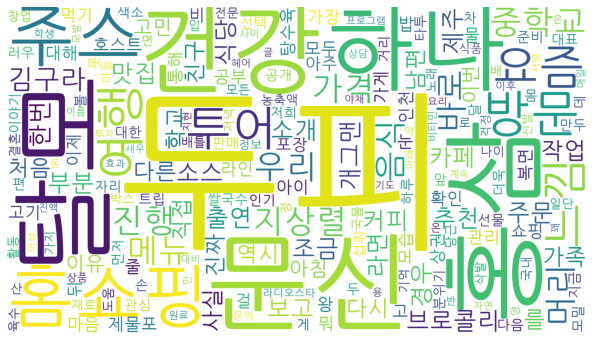

In [211]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [214]:
ls

 건강기능식품.csv            '제주스 양배추 관련키워드.png'
 업종별성별카드이용정보.csv   제주채소류재배현황.csv
 염경환.jpg                   조정석관련데이터.csv
 염경환관련데이터.csv         홀푸드코리아.csv


In [215]:
mask = np.array(Image.open('염경환.jpg'))
image_colors = ImageColorGenerator(mask)

In [233]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='NanumGothicCoding',
    relative_scaling=0.3,
    mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

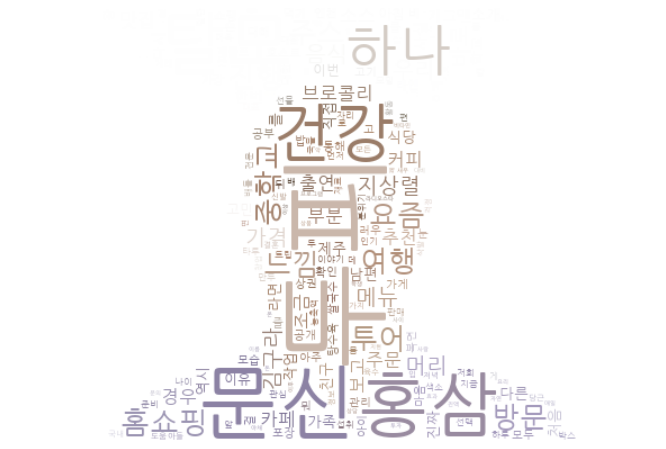

In [234]:
plt.figure(figsize=(12,8))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()

## 조정석